In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
plt.style.use('fivethirtyeight')
%matplotlib inline

In [3]:
from textblob import TextBlob

In [4]:
df = pd.read_csv("drugsComTrain_raw.csv")

In [5]:
df.head()

,Unnamed: 0,uniqueID,drugName,condition,review,rating,date,usefulCount,drug_class,sentiment_label,sentiment
0,0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,arb blocker,neutral,0.000000
1,1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,NaN,positive,0.168333
2,2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,NaN,positive,0.067210
3,3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,NaN,positive,0.179545
4,4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,NaN,positive,0.194444


In [6]:
df.columns

Index(['Unnamed: 0', 'uniqueID', 'drugName', 'condition', 'review', 'rating',
       'date', 'usefulCount', 'drug_class', 'sentiment_label', 'sentiment'],
      dtype='object')

In [7]:
df.isnull().sum()

Unnamed: 0              0
uniqueID                0
drugName                0
condition             899
review                  0
rating                  0
date                    0
usefulCount             0
drug_class         137837
sentiment_label         0
sentiment               0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,161297.0,80648.000000,46562.577522,0.0,40324.000000,80648.000000,120972.000000,161296.0
uniqueID,161297.0,115923.585305,67004.445170,2.0,58063.000000,115744.000000,173776.000000,232291.0
rating,161297.0,6.994377,3.272329,1.0,5.000000,8.000000,10.000000,10.0
usefulCount,161297.0,28.004755,36.403742,0.0,6.000000,16.000000,36.000000,1291.0
sentiment,161297.0,0.064847,0.222437,-1.0,-0.043264,0.058202,0.173722,1.0


In [9]:
df.info()
print('=============='*10)
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       161297 non-null  int64  
 1   uniqueID         161297 non-null  int64  
 2   drugName         161297 non-null  object 
 3   condition        160398 non-null  object 
 4   review           161297 non-null  object 
 5   rating           161297 non-null  int64  
 6   date             161297 non-null  object 
 7   usefulCount      161297 non-null  int64  
 8   drug_class       23460 non-null   object 
 9   sentiment_label  161297 non-null  object 
 10  sentiment        161297 non-null  float64
dtypes: float64(1), int64(4), object(6)
memory usage: 13.5+ MB


Unnamed: 0           int64
uniqueID             int64
drugName            object
condition           object
review              object
rating               int64
date                object
usefulCount          int64
drug_class          object
sentiment_label     object
sentiment          float64
dtype: object

In [10]:
num = len(df['drugName'].unique().tolist())
print('We number of Drugs are -',num )

We number of Drugs are - 3436


In [11]:
df['drugName'].value_counts().nlargest(20)

Levonorgestrel                        3657
Etonogestrel                          3336
Ethinyl estradiol / norethindrone     2850
Nexplanon                             2156
Ethinyl estradiol / norgestimate      2117
Ethinyl estradiol / levonorgestrel    1888
Phentermine                           1543
Sertraline                            1360
Escitalopram                          1292
Mirena                                1242
Implanon                              1102
Gabapentin                            1047
Bupropion                             1022
Venlafaxine                           1016
Miconazole                            1000
Medroxyprogesterone                    995
Citalopram                             995
Lexapro                                952
Bupropion / naltrexone                 950
Duloxetine                             934
Name: drugName, dtype: int64

In [12]:
drug_suffix = {"azole":"antifungal (except metronidazole)",
"caine":"anesthetic",
"cillin":"antibiotic(penicillins)",
"mycin":"antibiotic",
"micin":"antibiotic",
"cycline":"antibiotic",
"oxacin":"antibiotic",
"ceph":"antibiotic(cephalosporins)",
"cef":"antibiotic (cephalosporins)",
"dine":"h2 blockers (anti-ulcers)",
"done":"opiod analgesics",
"ide":"oral hypoglycemics",
"lam":"anti-anxiety",
"pam":"anti-anxiety",
"mide":"diuretics",
"zide":"diuretics",
"nium":"neuromuscular blocking agents",
"olol":"beta blockers",
"tidine":"h2 antagonist",
"tropin":"pituitary hormone",
"zosin":"alpha blocker",
"ase":"thrombolytics",
"plase":"thrombolytics",
"azepam":"anti-anziety(benzodiazepine)",
"azine":"antipyschotics (phenothiazine)",
"barbital":"barbiturate",
"dipine":"calcium channel blocker",
"lol":"beta blocker",
"zolam":"cns depressants",
"pril":"ace inhibitor",
"artan":"arb blocker",
"statins":"lipid-lowering drugs",
"parin":"anticoagulants",
"sone":"corticosteroid (prednisone)"}

In [13]:
def classify_drug(drugname):
    for i in drug_suffix.keys():
        if drugname.endswith(i):
            return drug_suffix[i]

In [14]:
classify_drug('valsartan')

'arb blocker'

In [15]:
df['drug_class'] = df['drugName'].apply(classify_drug)

In [16]:
df[['drugName','drug_class']]

,drugName,drug_class
0,Valsartan,arb blocker
1,Guanfacine,None
2,Lybrel,None
3,Ortho Evra,None
4,Buprenorphine / naloxone,None
...,...,...
161292,Campral,None
161293,Metoclopramide,oral hypoglycemics
161294,Orencia,None
161295,Thyroid desiccated,None


In [17]:
df['drug_class'].unique().tolist()

['arb blocker',
 None,
 'antifungal (except metronidazole)',
 'oral hypoglycemics',
 'opiod analgesics',
 'antibiotic',
 'anti-anxiety',
 'h2 blockers (anti-ulcers)',
 'beta blockers',
 'ace inhibitor',
 'thrombolytics',
 'alpha blocker',
 'corticosteroid (prednisone)',
 'antipyschotics (phenothiazine)',
 'antibiotic(penicillins)',
 'barbiturate',
 'calcium channel blocker',
 'anesthetic',
 'pituitary hormone',
 'antibiotic (cephalosporins)',
 'beta blocker',
 'neuromuscular blocking agents',
 'anticoagulants']

In [18]:
grp_drugs = len(df['drug_class'].unique().tolist())
print('Groups of Drugs by Class - ',grp_drugs)

Groups of Drugs by Class -  23


In [19]:
df['drug_class'].value_counts()

antifungal (except metronidazole)    4201
opiod analgesics                     3945
oral hypoglycemics                   3555
antibiotic                           3401
anti-anxiety                         2645
h2 blockers (anti-ulcers)            1228
beta blockers                         966
corticosteroid (prednisone)           886
antipyschotics (phenothiazine)        664
arb blocker                           560
ace inhibitor                         432
calcium channel blocker               233
alpha blocker                         153
anesthetic                            129
antibiotic(penicillins)               119
thrombolytics                         116
beta blocker                           97
neuromuscular blocking agents          45
antibiotic (cephalosporins)            29
pituitary hormone                      28
barbiturate                            19
anticoagulants                          9
Name: drug_class, dtype: int64

In [20]:
drug_groups = df.groupby('drug_class').size()

In [21]:
type(drug_groups)


pandas.core.series.Series

In [22]:
drug_groups.to_frame()

,0
drug_class,
ace inhibitor,432
alpha blocker,153
anesthetic,129
anti-anxiety,2645
antibiotic,3401
antibiotic (cephalosporins),29
antibiotic(penicillins),119
anticoagulants,9
antifungal (except metronidazole),4201


In [23]:
drug_groups_df = pd.DataFrame({'drug_class':drug_groups.index,'counts':drug_groups.values})

In [24]:
len(df['condition'].unique().tolist())

885

In [25]:
df['condition'].value_counts()

Birth Control                                              28788
Depression                                                  9069
Pain                                                        6145
Anxiety                                                     5904
Acne                                                        5588
                                                           ...  
Dissociative Identity Disorde                                  1
Hydrocephalus                                                  1
Hyperlipoproteinemia Type III, Elevated beta-VLDL   IDL        1
Q Feve                                                         1
Neutropenia                                                    1
Name: condition, Length: 884, dtype: int64

In [26]:
common_conditions = df['condition'].value_counts().nlargest(20)

In [27]:
new = pd.DataFrame({'drug_class':common_conditions.index,'counts':common_conditions.values})

In [28]:
df['condition'].value_counts().nsmallest(20)

Meningococcal Meningitis Prophylaxis                     1
mist (                                                   1
Cluster-Tic Syndrome                                     1
Syringomyelia                                            1
Gestational Diabetes                                     1
Aspergillosis, Aspergilloma                              1
Pseudogout, Prophylaxis                                  1
Portal Hypertension                                      1
Reversal of Nondepolarizing Muscle Relaxants             1
47</span> users found this comment helpful.              1
Short Stature for Age                                    1
Neurotic Depression                                      1
Cerebral Edema                                           1
me                                                       1
Hyperuricemia Secondary to Chemotherapy                  1
Prevention of Perinatal Group B Streptococcal Disease    1
Small Bowel or Pancreatic Fistula                       

In [29]:
drug_per_cond = df.groupby('condition')['drugName'].nunique().nlargest(20)

In [30]:
drug_per_cond_df = pd.DataFrame({'drug_class':drug_per_cond.index,'counts':drug_per_cond.values})

In [31]:
avg_rating = (df['rating'].groupby(df['drugName']).mean())
avg_rating

drugName
A + D Cracked Skin Relief               10.000000
A / B Otic                              10.000000
Abacavir / dolutegravir / lamivudine     8.211538
Abacavir / lamivudine / zidovudine       9.000000
Abatacept                                7.157895
                                          ...    
Zyvox                                    9.000000
ZzzQuil                                  2.500000
depo-subQ provera 104                    1.000000
ella                                     6.980392
femhrt                                   4.000000
Name: rating, Length: 3436, dtype: float64

In [32]:
df['review'].head()

0    "It has no side effect, I take it in combinati...
1    "My son is halfway through his fourth week of ...
2    "I used to take another oral contraceptive, wh...
3    "This is my first time using any form of birth...
4    "Suboxone has completely turned my life around...
Name: review, dtype: object

In [33]:
from textblob import TextBlob

In [34]:
!pip install textblob

In [35]:
from textblob import TextBlob

In [36]:
df['review'].head()

0    "It has no side effect, I take it in combinati...
1    "My son is halfway through his fourth week of ...
2    "I used to take another oral contraceptive, wh...
3    "This is my first time using any form of birth...
4    "Suboxone has completely turned my life around...
Name: review, dtype: object

In [37]:
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.polarity

def get_sentiment_label(text):
    blob = TextBlob(text)
    if blob.polarity > 0:
        result = 'positive'
    elif blob.polarity < 0:
        result = 'negative'
    else:
        result = 'neutral'
    return result

In [38]:
df['sentiment_label'] = df['review'].apply(get_sentiment_label)
df['sentiment'] = df['review'].apply(get_sentiment)

In [52]:
X=df[['review','sentiment','sentiment_label']].head()

In [40]:
df['sentiment_label'].value_counts()

positive    101041
negative     53303
neutral       6953
Name: sentiment_label, dtype: int64

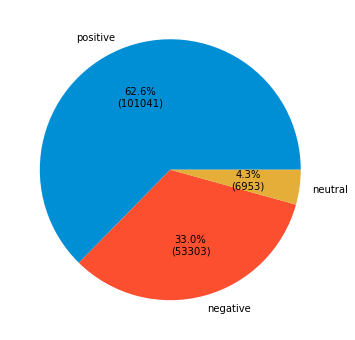

In [41]:
plt.figure(figsize=(12,6))

def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

s = df['sentiment_label'].value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s))
plt.show()

In [42]:
df['sentiment_label'].value_counts()

positive    101041
negative     53303
neutral       6953
Name: sentiment_label, dtype: int64

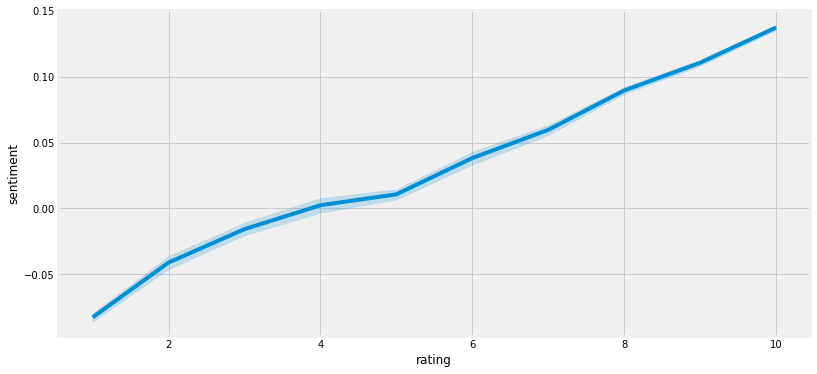

In [43]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df,x='rating',y='sentiment')
plt.show()

In [47]:
import os
os.getcwd()

'/Users/shaikthasneem/Downloads'

In [45]:
os.chdir('/Users/shaikthasneem/Applications')

In [ ]:
df.to_csv('new_drugsComTrain_raw.csv')

In [46]:
os.chdir('/Users/shaikthasneem/Downloads')

In [48]:
Y = df.drop(['uniqueID','drugName','condition','date','usefulCount','drug_class','sentiment_label','sentiment'], axis = 1)

In [54]:
print(Y)

        Unnamed: 0                                             review  rating
0                0  "It has no side effect, I take it in combinati...       9
1                1  "My son is halfway through his fourth week of ...       8
2                2  "I used to take another oral contraceptive, wh...       5
3                3  "This is my first time using any form of birth...       8
4                4  "Suboxone has completely turned my life around...       9
...            ...                                                ...     ...
161292      161292  "I wrote my first report in Mid-October of 201...      10
161293      161293  "I was given this in IV before surgey. I immed...       1
161294      161294  "Limited improvement after 4 months, developed...       2
161295      161295  "I&#039;ve been on thyroid medication 49 years...      10
161296      161296  "I&#039;ve had chronic constipation all my adu...       9

[161297 rows x 3 columns]


In [53]:
X.to_csv('new1_drugsComTrain_raw.csv')

In [55]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  161297 non-null  int64 
 1   review      161297 non-null  object
 2   rating      161297 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.7+ MB
